In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import plotly.express as px

In [2]:
df=pd.read_csv('/content/most_runs_in_cricket.csv')

In [3]:
df.Player

0            SR Tendulkar (INDIA)
1     KC Sangakkara (Asia/ICC/SL)
2            RT Ponting (AUS/ICC)
3      DPMD Jayawardene (Asia/SL)
4          JH Kallis (Afr/ICC/SA)
                 ...             
83          DB Vengsarkar (INDIA)
84           ME Trescothick (ENG)
85              G Gambhir (INDIA)
86                  MD Crowe (NZ)
87                GW Flower (ZIM)
Name: Player, Length: 88, dtype: object

In [4]:
df.head()

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,0,SR Tendulkar (INDIA),1989-2013,664,782,74,34357,248,48.52,50817+,67.58,100,164,34,4076,264
1,1,KC Sangakkara (Asia/ICC/SL),2000-2015,594,666,67,28016,319,46.77,42086,66.56,63,153,28,3015,159
2,2,RT Ponting (AUS/ICC),1995-2012,560,668,70,27483,257,45.95,40130,68.48,71,146,39,2781,246
3,3,DPMD Jayawardene (Asia/SL),1997-2015,652,725,62,25957,374,39.15,40100,64.73,54,136,47,2679,170
4,4,JH Kallis (Afr/ICC/SA),1995-2014,519,617,97,25534,224,49.10,45346,56.30,62,149,33,2455,254


In [5]:
import missingno as msno 

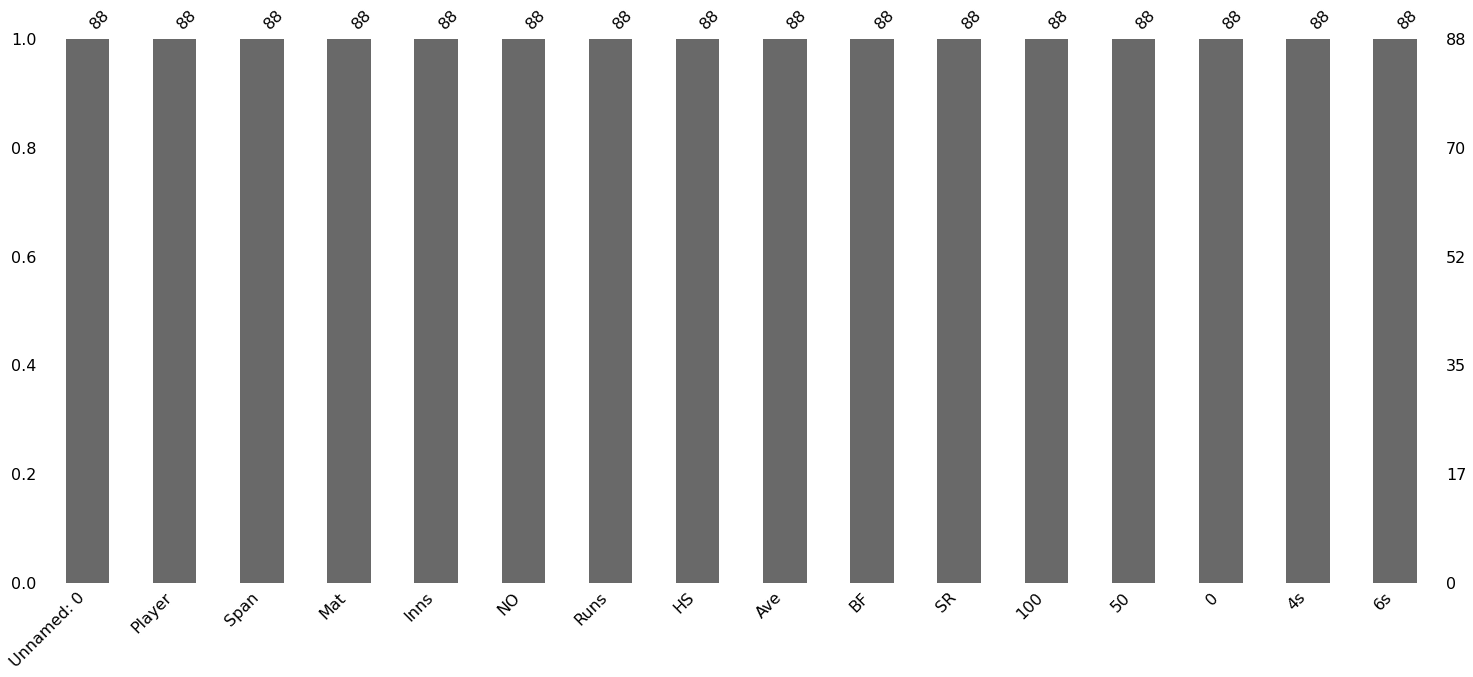

In [6]:
msno.bar(df)

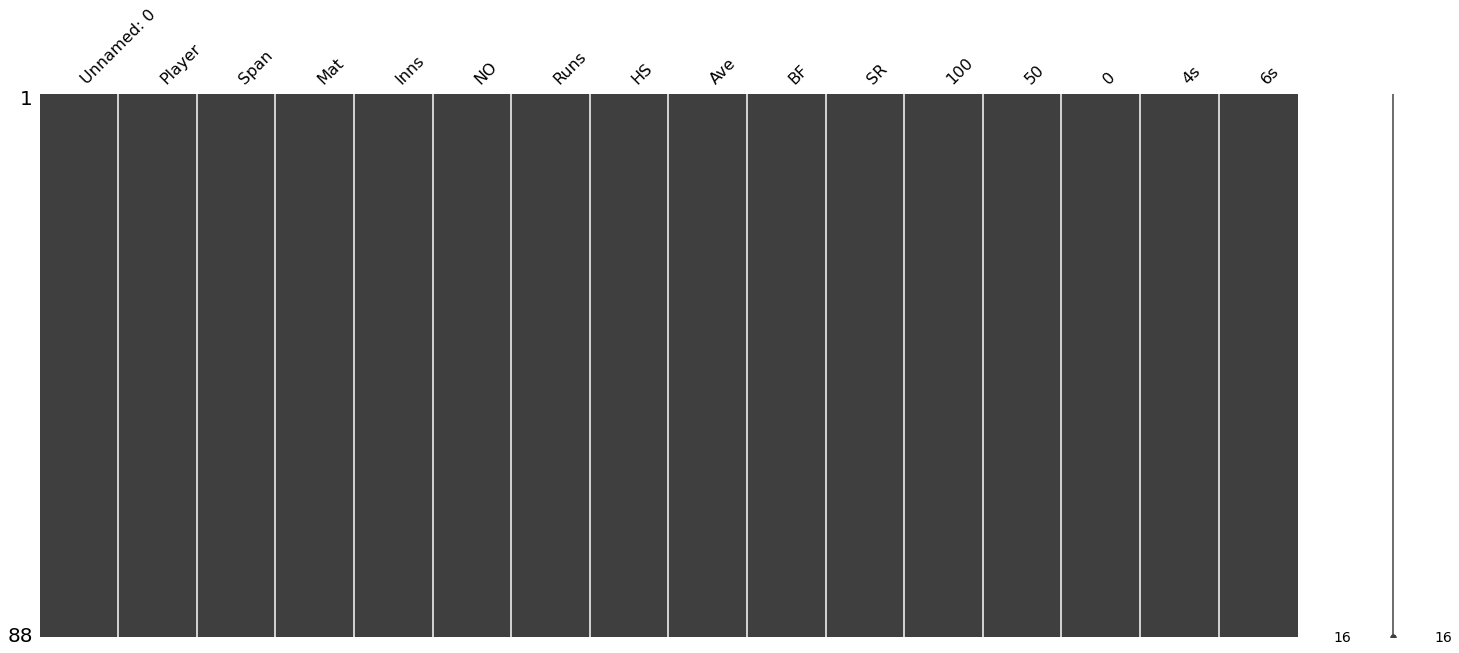

In [7]:
msno.matrix(df)

/usr/local/lib/python3.8/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.8/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


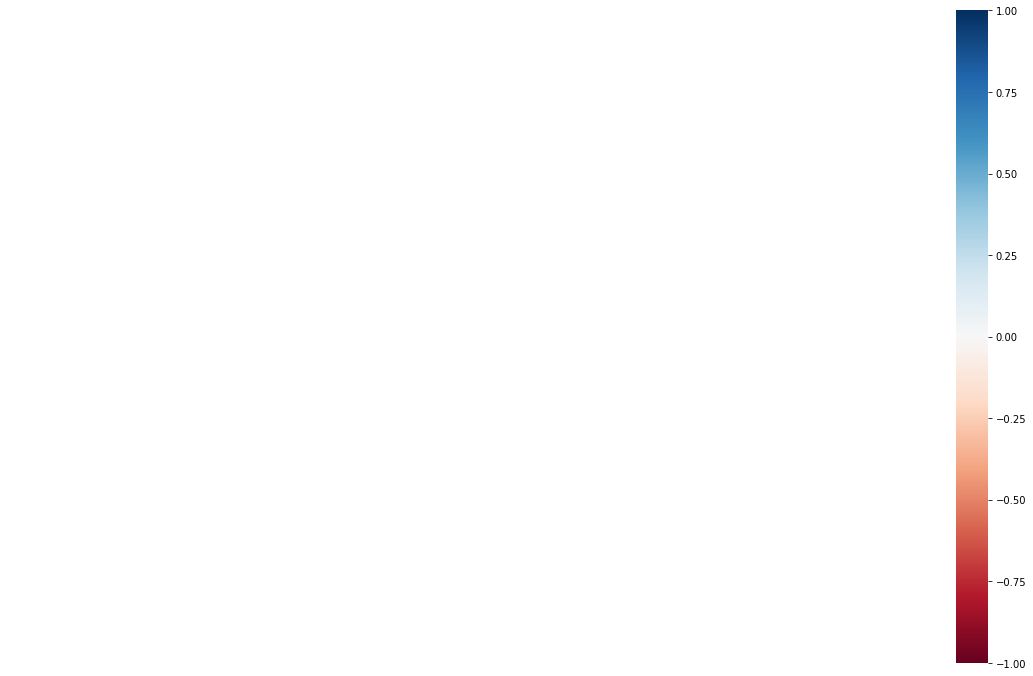

In [8]:
msno.heatmap(df)

In [9]:
df_jh=df.head().query("Mat==519")

In [10]:
df_jh.head()

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
4,4,JH Kallis (Afr/ICC/SA),1995-2014,519,617,97,25534,224,49.1,45346,56.3,62,149,33,2455,254


In [11]:
px.strip(df,x='Player',color="6s",y='100',orientation="h")

In [12]:
px.scatter(df,x='Player',color="0",y='100',hover_name='Player',size='6s',orientation="h")

In [13]:
df.columns

Index(['Unnamed: 0', 'Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS',
       'Ave', 'BF', 'SR', '100', '50', '0', '4s', '6s'],
      dtype='object')

In [14]:
px.scatter_3d(df,x='Player',y='Span',z='Mat',color="Inns",hover_name='NO',size='Runs',
              symbol='Ave',color_discrete_map={'100':'Green', '50':'Red', '0':'Blue', '4s':'yellow', '6s':'Orange'})

In [15]:
px.bar(df,x='100',color="Player",hover_name='50', y='100',facet_col="100",pattern_shape="SR")

In [16]:
px.sunburst(df,color="6s",values='100',path=['50','100'],hover_name='Player')

In [17]:
px.treemap(df,color="Inns",values='0',path=['100','Ave'],hover_name='Player')

In [18]:
px.choropleth(df,color="6s",locations="Player",hover_name='100')

In [19]:
df.set_index("Player",inplace=True)

In [20]:
df.rename(columns={'span':'Duration','Mat':'matches','100':'centries',}, inplace=True)


In [21]:
df.rename(columns={'Ave':'average','0':'eggs'},inplace=True)
df.head(100)

,Unnamed: 0,Span,matches,Inns,NO,Runs,HS,average,BF,SR,centries,50,eggs,4s,6s
Player,,,,,,,,,,,,,,,
SR Tendulkar (INDIA),0,1989-2013,664,782,74,34357,248,48.52,50817+,67.58,100,164,34,4076,264
KC Sangakkara (Asia/ICC/SL),1,2000-2015,594,666,67,28016,319,46.77,42086,66.56,63,153,28,3015,159
RT Ponting (AUS/ICC),2,1995-2012,560,668,70,27483,257,45.95,40130,68.48,71,146,39,2781,246
DPMD Jayawardene (Asia/SL),3,1997-2015,652,725,62,25957,374,39.15,40100,64.73,54,136,47,2679,170
JH Kallis (Afr/ICC/SA),4,1995-2014,519,617,97,25534,224,49.10,45346,56.30,62,149,33,2455,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DB Vengsarkar (INDIA),83,1976-1992,245,305,41,10376,166,39.30,15989+,50.04,18,58,22,737,41
ME Trescothick (ENG),84,2000-2006,202,268,16,10326,219,40.97,15903,64.93,26,52,25,1382,84
G Gambhir (INDIA),85,2003-2016,242,283,18,10324,206,38.95,14994,68.85,20,63,20,1188,37


In [22]:
df[df.index=='Younis Khan (PAK)']

,Unnamed: 0,Span,matches,Inns,NO,Runs,HS,average,BF,SR,centries,50,eggs,4s,6s
Player,,,,,,,,,,,,,,,
Younis Khan (PAK),17,2000-2017,408,491,45,17790,313,39.88,29367,60.57,41,83,43,1691,138


In [23]:
# optional: to remove the name of the index
df.index.name = None

In [24]:
df.iloc[17,4]

45

In [25]:
df.loc['Younis Khan (PAK)','NO']

45

In [26]:
df.iloc[17]

Unnamed: 0           17
Span          2000-2017
matches             408
Inns                491
NO                   45
Runs              17790
HS                  313
average           39.88
BF                29367
SR                60.57
centries             41
50                   83
eggs                 43
4s                 1691
6s                  138
Name: Younis Khan (PAK), dtype: object

In [27]:
df.centries

SR Tendulkar (INDIA)           100
KC Sangakkara (Asia/ICC/SL)     63
RT Ponting (AUS/ICC)            71
DPMD Jayawardene (Asia/SL)      54
JH Kallis (Afr/ICC/SA)          62
                              ... 
DB Vengsarkar (INDIA)           18
ME Trescothick (ENG)            26
G Gambhir (INDIA)               20
MD Crowe (NZ)                   21
GW Flower (ZIM)                 12
Name: centries, Length: 88, dtype: int64

In [28]:
all(isinstance(column, str) for column in df.columns)

True

In [29]:
df.columns = list(map(str, df.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in df.columns)

True

In [30]:
df.index.name=None


In [31]:
df[df.index == 'GW Flower (ZIM)']

,Unnamed: 0,Span,matches,Inns,NO,Runs,HS,average,BF,SR,centries,50,eggs,4s,6s
GW Flower (ZIM),87,1992-2010,288,337,24,10028,201,32.03,19736,50.81,12,55,34,906,53


In [32]:
df.iloc[87, 4]

24

In [33]:
df.loc['GW Flower (ZIM)', ["Inns","NO","Runs", "BF"]]

Inns      337
NO         24
Runs    10028
BF      19736
Name: GW Flower (ZIM), dtype: object

In [34]:
df.iloc[87, [3, 4, 5, 6, 7, 8]]

Inns         337
NO            24
Runs       10028
HS           201
average    32.03
BF         19736
Name: GW Flower (ZIM), dtype: object

In [35]:
df['Total'] = df.sum(axis=1)
df.head()


<ipython-input-35-c00bef05511f>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,Unnamed: 0,Span,matches,Inns,NO,Runs,HS,average,BF,SR,centries,50,eggs,4s,6s,Total
SR Tendulkar (INDIA),0,1989-2013,664,782,74,34357,248,48.52,50817+,67.58,100,164,34,4076,264,40879.10
KC Sangakkara (Asia/ICC/SL),1,2000-2015,594,666,67,28016,319,46.77,42086,66.56,63,153,28,3015,159,33194.33
RT Ponting (AUS/ICC),2,1995-2012,560,668,70,27483,257,45.95,40130,68.48,71,146,39,2781,246,32437.43
DPMD Jayawardene (Asia/SL),3,1997-2015,652,725,62,25957,374,39.15,40100,64.73,54,136,47,2679,170,30962.88
JH Kallis (Afr/ICC/SA),4,1995-2014,519,617,97,25534,224,49.10,45346,56.30,62,149,33,2455,254,30053.40


In [36]:
df['6s'].max()

553

In [37]:
df.columns 

Index(['Unnamed: 0', 'Span', 'matches', 'Inns', 'NO', 'Runs', 'HS', 'average',
       'BF', 'SR', 'centries', '50', 'eggs', '4s', '6s', 'Total'],
      dtype='object')

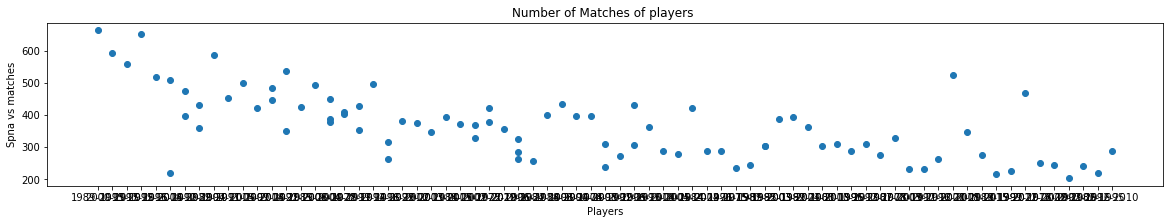

In [38]:
import matplotlib.pyplot as plt
from pylab import rcParams
plt.rcParams["figure.figsize"] = (20,3)
plt.scatter(df['Span'],df['matches'])
plt.title("Number of Matches of players ")
plt.xlabel("Players")
plt.ylabel("Spna vs matches")
plt.show()



In [39]:
Span = list(map(str, range(1980, 2014)))


In [40]:
df.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df.head()

# transpose the dataframe

df_top5.head()

,Unnamed: 0,Span,matches,Inns,NO,Runs,HS,average,BF,SR,centries,50,eggs,4s,6s,Total
SR Tendulkar (INDIA),0,1989-2013,664,782,74,34357,248,48.52,50817+,67.58,100,164,34,4076,264,40879.10
KC Sangakkara (Asia/ICC/SL),1,2000-2015,594,666,67,28016,319,46.77,42086,66.56,63,153,28,3015,159,33194.33
RT Ponting (AUS/ICC),2,1995-2012,560,668,70,27483,257,45.95,40130,68.48,71,146,39,2781,246,32437.43
DPMD Jayawardene (Asia/SL),3,1997-2015,652,725,62,25957,374,39.15,40100,64.73,54,136,47,2679,170,30962.88
JH Kallis (Afr/ICC/SA),4,1995-2014,519,617,97,25534,224,49.10,45346,56.30,62,149,33,2455,254,30053.40


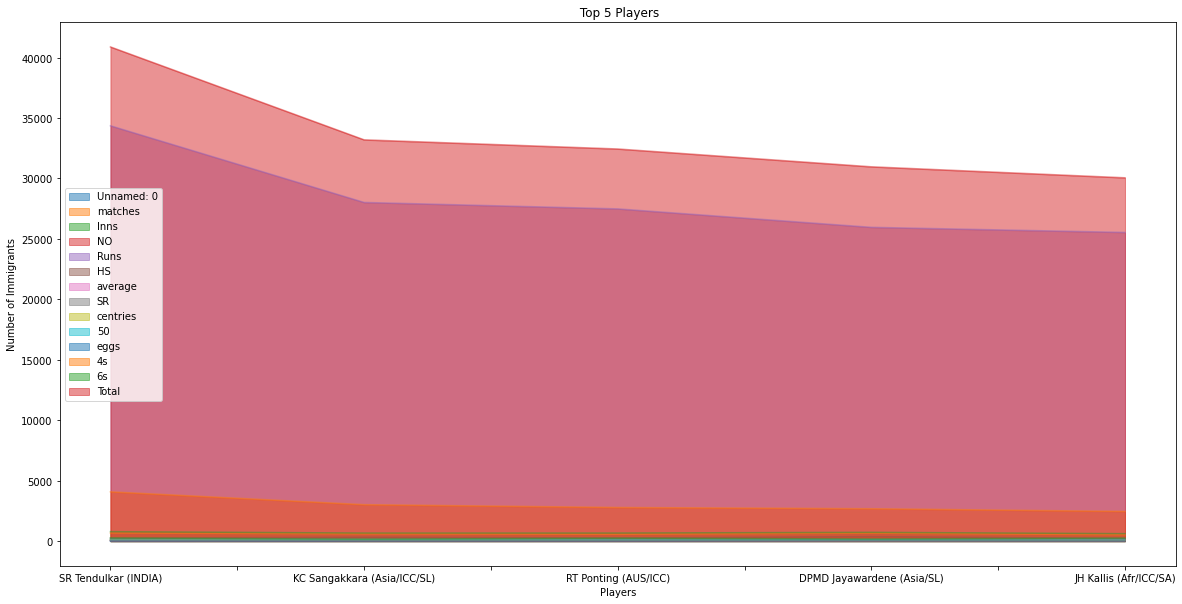

In [41]:
# let's change the index values of df_top5 to type integer for plotting
df_top5.index = df_top5.index.map(str)
df_top5.plot(kind='area',
             stacked=False,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title(' Top 5 Players')
plt.ylabel('Number of Immigrants')
plt.xlabel('Players')

plt.show()

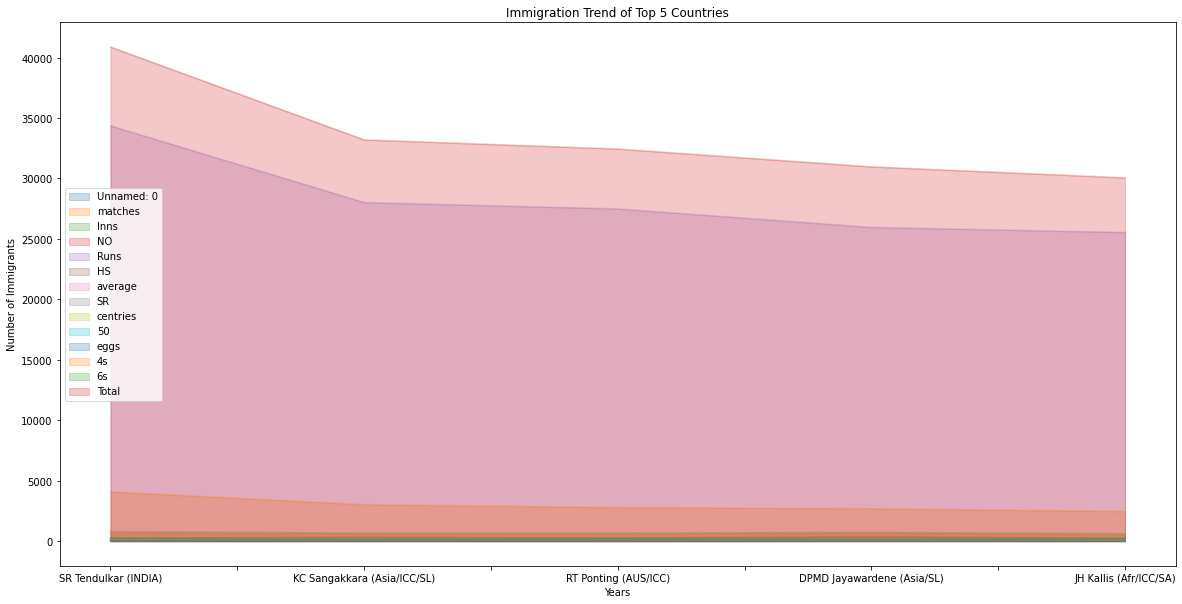

In [42]:
df_top5.plot(kind='area', 
             alpha=0.25,  # 0 - 1, default value alpha = 0.5
             stacked=False,
             figsize=(20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Text(0.5, 0, 'Years')

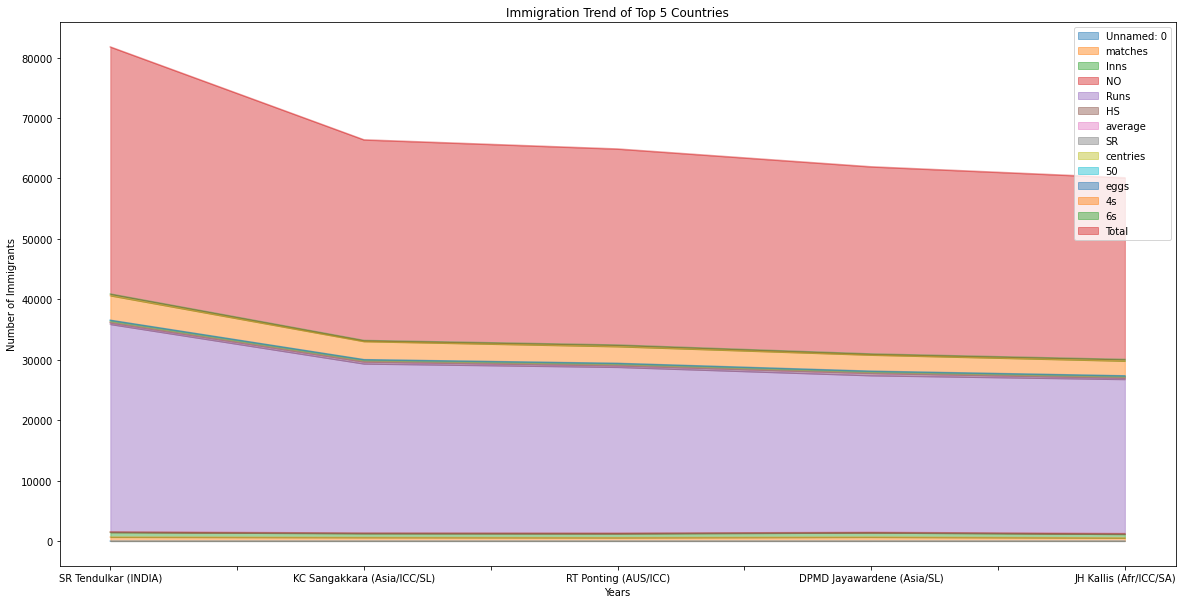

In [46]:
ax = df_top5.plot(kind='area', alpha=0.45, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

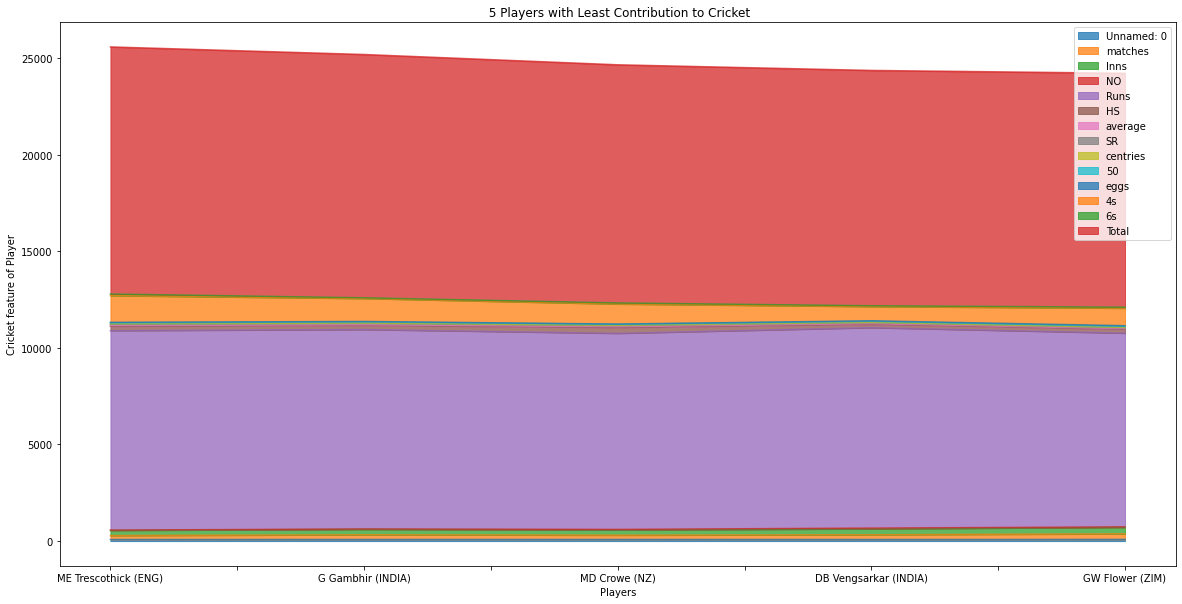

In [47]:
df_least5 = df.tail(5)

# transpose the dataframe
df_least5.head()

df_least5.index = df_least5.index.map(str) # let's change the index values of df_least5 to type integer for plotting
df_least5.plot(kind='area', alpha=0.75, figsize=(20, 10)) 

plt.title(' 5 Players with Least Contribution to Cricket')
plt.ylabel('Cricket feature of Player')
plt.xlabel('Players')

plt.show()



In [48]:
df['6s'].head()

SR Tendulkar (INDIA)           264
KC Sangakkara (Asia/ICC/SL)    159
RT Ponting (AUS/ICC)           246
DPMD Jayawardene (Asia/SL)     170
JH Kallis (Afr/ICC/SA)         254
Name: 6s, dtype: int64

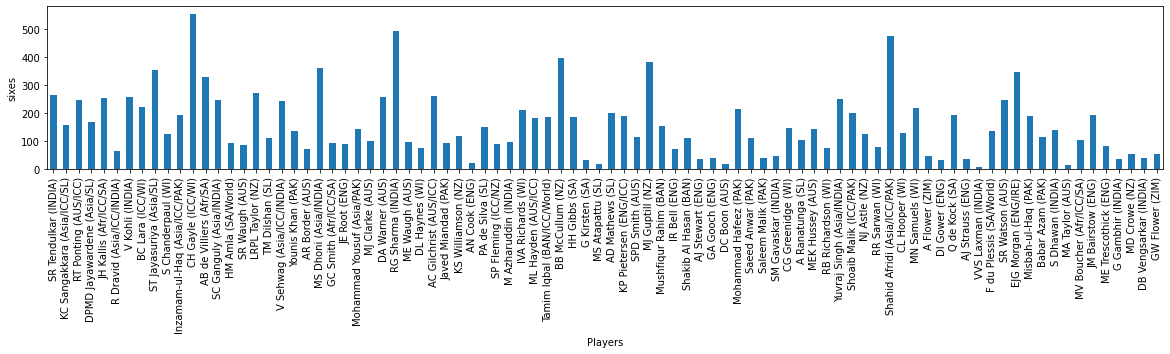

In [49]:
ax=df['6s'].plot(kind='bar')
ax.set_xlabel('Players')
ax.set_ylabel('sixes')
plt.show()

In [50]:
df.columns

Index(['Unnamed: 0', 'Span', 'matches', 'Inns', 'NO', 'Runs', 'HS', 'average',
       'BF', 'SR', 'centries', '50', 'eggs', '4s', '6s', 'Total'],
      dtype='object')

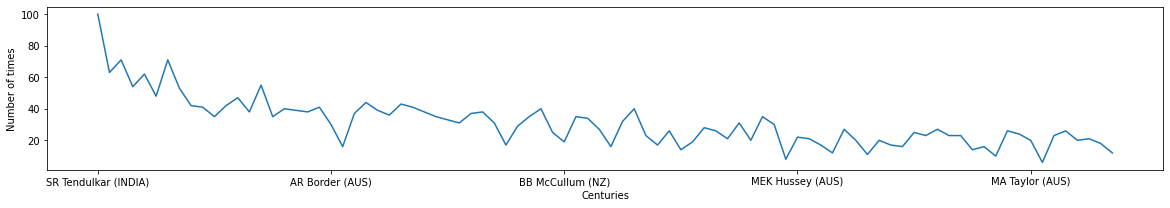

In [54]:
# Create a histogram of player runs
df['centries'].plot(kind='line')
plt.xlabel('Centuries')
plt.ylabel('Number of times')
plt.show()

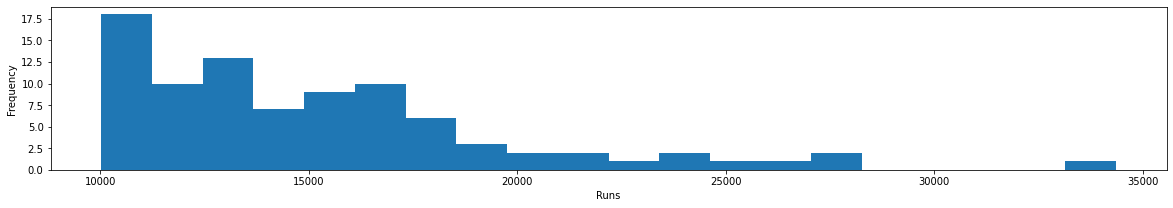

In [53]:
# Create a histogram of player runs
df['Runs'].plot(kind='hist', bins=20)
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

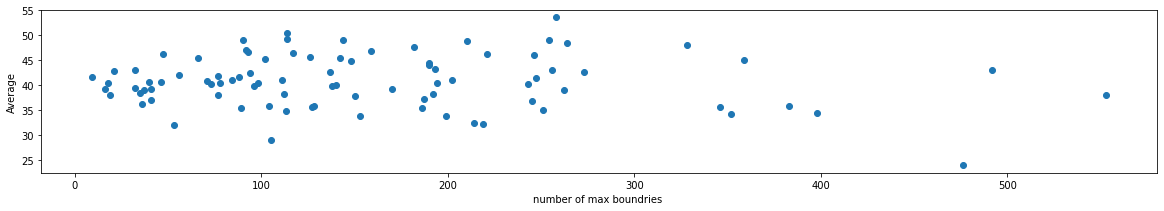

In [56]:
# Create a scatter plot of player runs against player average
plt.scatter(df['6s'], df['average'])
plt.xlabel('number of max boundries ')
plt.ylabel('Average')
plt.show()

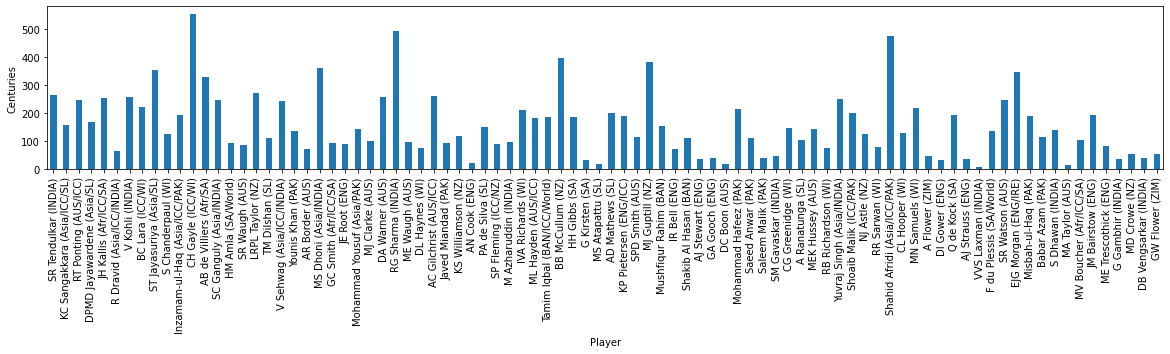

In [57]:
# Create a bar chart of player centuries
df['6s'].plot(kind='bar')
plt.xlabel('Player')
plt.ylabel('Centuries')
plt.show()


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, learning_curve, ShuffleSplit
from sklearn.linear_model import LinearRegression

# Load the data
data = pd.read_csv('/content/most_runs_in_cricket.csv')



In [66]:
# Replace the "+" sign with an empty string
data['BF'] = data['BF'].str.replace('+', '')

# Convert the "Runs" column to an integer type
data['BF'] = data['BF'].astype(int)

# Save the modified data to a new CSV file
data.to_csv('cricket_players_modified.csv', index=False)


<ipython-input-66-08c23c5445c1>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [73]:
# Load the data
data = pd.read_csv('/content/cricket_players_modified.csv')


In [74]:
# Select the features and target variable
X = data[['Inns', 'NO', 'BF', '4s', '6s']]
y = data['Runs']

In [75]:
# Train a linear regression model using cross-validation
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
model = LinearRegression()
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring='neg_mean_squared_error')


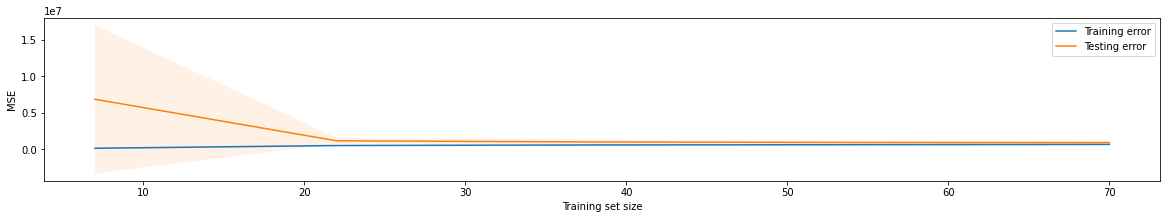

In [76]:
# Plot the learning curve
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Testing error')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('MSE')
plt.legend()
plt.show()
